<a href="https://colab.research.google.com/github/yasirumakavita/MLF-CAPS/blob/main/MLFoundation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ML Foundation - Capstone Project

By: Yasiru Makavita

* Model: Regression & Classification
* Dataset: Wisconsin Prognostic Breast Cancer (WPBC) from UCI ML Repo
* Outout: Predict if the cancer is recurrent or not recurrent and 
   time for recurrence


In [324]:
#Importing the necessary libraries

import numpy as np
import pandas as pd

from matplotlib import pyplot
import seaborn as sns

import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

from scipy import stats

from sklearn.model_selection import GridSearchCV

##Loading the DataSet

In [87]:
#file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'

# Load CSV File

data = pd.read_csv(file_name)
data.sample(20)

,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.89,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
64,869104,N,100,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,0.7049,1.3320,4.533,74.08,0.006770,0.01938,0.03067,0.011670,0.01875,0.003434,19.92,25.27,129.0,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.08158,1.5,1
137,90291,N,57,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,0.4157,1.6270,2.914,33.01,0.008312,0.01742,0.03389,0.015760,0.01740,0.002871,15.79,31.71,102.2,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836,3.0,0
31,855167,N,34,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,0.2385,0.8265,1.572,20.53,0.003280,0.01102,0.01390,0.006881,0.01380,0.001286,15.93,30.25,102.5,787.9,0.1094,0.2043,0.2085,0.1112,0.2994,0.07146,1.5,0
161,915460,N,41,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,0.3331,1.9610,2.937,32.52,0.009538,0.04940,0.06019,0.020410,0.02105,0.006000,17.11,36.33,117.7,909.4,0.1732,0.4967,0.5911,0.2163,0.3013,0.10670,2.5,1
142,906023,R,49,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,0.2085,0.06864,1.3700,1.2130,9.424,176.50,0.008198,0.03889,0.04493,0.021390,0.02018,0.005815,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480,0.4,0
18,852631,N,116,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.03799,0.03732,0.023970,0.02308,0.007444,22.25,21.40,152.4,1461.0,0.1545,0.3949,0.3853,0.2550,0.4066,0.10590,4.4,1
184,937897,N,17,13.63,24.70,89.65,569.2,0.10550,0.13120,0.11610,0.06403,0.1791,0.07058,0.3223,1.1480,2.797,25.79,0.007254,0.03085,0.03225,0.015850,0.01783,0.004359,15.33,31.96,107.7,712.2,0.1554,0.3515,0.3409,0.1689,0.2739,0.09945,2.0,0
81,875562,N,75,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,0.2796,0.9622,3.591,25.20,0.008081,0.05122,0.05551,0.018830,0.02545,0.004312,16.08,27.78,118.6,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701,8.0,9
92,8811842,N,48,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,0.2094,0.05581,0.9553,1.1860,6.487,124.40,0.006804,0.03169,0.03446,0.017120,0.01897,0.004045,25.73,28.64,170.3,2009.0,0.1353,0.3235,0.3617,0.1820,0.3070,0.08255,2.6,0
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2


#Assigning Column names

In [88]:
data.shape

(197, 35)

In [89]:
colum_headers = ['ID', 'Outcome',	'Time', 'Radius M','Texture M','Perimeter M', 'Area M','Smoothness M','Compactness M'	,'Concavity M','Concave M','Symmetry M', 'Fractal M',
                 'Radius SE','Texture SE','Perimeter SE', 'Area SE','Smoothness SE','Compactness SE'	,'Concavity SE','Concave SE','Symmetry SE', 'Fractal SE',
                 'Radius W','Texture W','Perimeter W', 'Area W','Smoothness W','Compactness W'	,'Concavity W','Concave W','Symmetry W', 'Fractal W','TS','LNS']
# M - Mean, SE - Standard Error, W - Worst (Mean of 3 largest values) 
# TS - Tumor Size, LNS - Lymph Node Status
data.columns = colum_headers
data.head(10)


,ID,Outcome,Time,Radius M,Texture M,Perimeter M,Area M,Smoothness M,Compactness M,Concavity M,Concave M,Symmetry M,Fractal M,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave SE,Symmetry SE,Fractal SE,Radius W,Texture W,Perimeter W,Area W,Smoothness W,Compactness W,Concavity W,Concave W,Symmetry W,Fractal W,TS,LNS
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.034490,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.029870,0.04561,0.013570,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
5,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.12130,0.08910,0.1727,0.05767,0.5285,0.8434,3.592,61.21,0.003703,0.023540,0.02222,0.013320,0.01378,0.003926,23.39,25.45,152.60,1593.0,0.1144,0.3371,0.2990,0.19220,0.2726,0.09581,1.5,?
6,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10
7,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1
8,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20
9,845636,N,123,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,2.0,0


#Pre Processing
##Understanding the dataset

In [90]:
#Unserstand the numer of positive and negative cases
data['Outcome'].value_counts()

N    150
R     47
Name: Outcome, dtype: int64

In [91]:
data.dtypes

ID                  int64
Outcome            object
Time                int64
Radius M          float64
Texture M         float64
Perimeter M       float64
Area M            float64
Smoothness M      float64
Compactness M     float64
Concavity M       float64
Concave M         float64
Symmetry M        float64
Fractal M         float64
Radius SE         float64
Texture SE        float64
Perimeter SE      float64
Area SE           float64
Smoothness SE     float64
Compactness SE    float64
Concavity SE      float64
Concave SE        float64
Symmetry SE       float64
Fractal SE        float64
Radius W          float64
Texture W         float64
Perimeter W       float64
Area W            float64
Smoothness W      float64
Compactness W     float64
Concavity W       float64
Concave W         float64
Symmetry W        float64
Fractal W         float64
TS                float64
LNS                object
dtype: object

In [92]:
data.describe(include='all')

,ID,Outcome,Time,Radius M,Texture M,Perimeter M,Area M,Smoothness M,Compactness M,Concavity M,Concave M,Symmetry M,Fractal M,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave SE,Symmetry SE,Fractal SE,Radius W,Texture W,Perimeter W,Area W,Smoothness W,Compactness W,Concavity W,Concave W,Symmetry W,Fractal W,TS,LNS
count,1.970000e+02,197,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
mean,1.999966e+06,NaN,46.812183,17.409239,22.248985,114.843147,969.822843,0.102721,0.142846,0.156485,0.086858,0.192786,0.062702,0.603237,1.261275,4.256832,70.22203,0.006774,0.031286,0.040793,0.015126,0.020573,0.003989,21.018731,30.103858,140.351066,1404.801015,0.144045,0.365977,0.437308,0.179091,0.323687,0.090877,2.836548,NaN
std,2.893285e+06,NaN,34.532302,3.169432,4.292343,21.437046,353.033009,0.012542,0.049947,0.070670,0.033943,0.027503,0.007258,0.310899,0.525904,2.199624,48.10441,0.002977,0.017616,0.020913,0.005505,0.009599,0.001942,4.253585,6.012600,28.965853,587.495781,0.021991,0.163918,0.173845,0.045079,0.075247,0.021215,1.936777,NaN
min,8.423000e+03,NaN,1.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,0.193800,0.362100,1.153000,13.99000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,NaN
25%,8.561060e+05,NaN,14.000000,15.050000,19.380000,98.000000,701.900000,0.093870,0.110800,0.106300,0.063670,0.173900,0.056710,0.387700,0.920900,2.735000,35.24000,0.005015,0.020080,0.026810,0.011430,0.014790,0.002747,17.620000,26.200000,117.900000,943.200000,0.129400,0.249000,0.324100,0.152800,0.277000,0.076510,1.500000,NaN
50%,8.864520e+05,NaN,40.000000,17.290000,21.720000,113.400000,928.800000,0.102000,0.131800,0.151900,0.086240,0.189400,0.061660,0.529900,1.161000,3.767000,58.38000,0.006208,0.027910,0.036940,0.014240,0.017920,0.003727,20.470000,30.120000,136.500000,1295.000000,0.141900,0.351500,0.402400,0.179500,0.310300,0.087010,2.500000,NaN
75%,9.279970e+05,NaN,73.000000,19.590000,24.520000,129.700000,1194.000000,0.111000,0.172300,0.201300,0.104300,0.209400,0.066720,0.754800,1.458000,5.216000,92.99000,0.007974,0.038450,0.049070,0.017700,0.022930,0.004635,23.730000,33.480000,159.900000,1696.000000,0.155000,0.423800,0.541100,0.207300,0.358900,0.101400,3.500000,NaN


##Coverting Catagorical values into neumerical values

In [93]:
data.head()

,ID,Outcome,Time,Radius M,Texture M,Perimeter M,Area M,Smoothness M,Compactness M,Concavity M,Concave M,Symmetry M,Fractal M,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave SE,Symmetry SE,Fractal SE,Radius W,Texture W,Perimeter W,Area W,Smoothness W,Compactness W,Concavity W,Concave W,Symmetry W,Fractal W,TS,LNS
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.01805,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [94]:
data['Outcome'] = data['Outcome'].replace({"N": 0, "R": 1})
data.head()

,ID,Outcome,Time,Radius M,Texture M,Perimeter M,Area M,Smoothness M,Compactness M,Concavity M,Concave M,Symmetry M,Fractal M,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave SE,Symmetry SE,Fractal SE,Radius W,Texture W,Perimeter W,Area W,Smoothness W,Compactness W,Concavity W,Concave W,Symmetry W,Fractal W,TS,LNS
0,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.01805,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,1,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


##Treating Missing Values

In [95]:
#Checking for missing values - missing values indicated by '?'
data.isin(['?']).value_counts()

ID     Outcome  Time   Radius M  Texture M  Perimeter M  Area M  Smoothness M  Compactness M  Concavity M  Concave M  Symmetry M  Fractal M  Radius SE  Texture SE  Perimeter SE  Area SE  Smoothness SE  Compactness SE  Concavity SE  Concave SE  Symmetry SE  Fractal SE  Radius W  Texture W  Perimeter W  Area W  Smoothness W  Compactness W  Concavity W  Concave W  Symmetry W  Fractal W  TS     LNS  
False  False    False  False     False      False        False   False         False          False        False      False       False      False      False       False         False    False          False           False         False       False        False       False     False      False        False   False         False          False        False      False       False      False  False    193
                                                                                                                                                                                                 

In [96]:
#Undertsanding the missing values
data[data.values == '?']

,ID,Outcome,Time,Radius M,Texture M,Perimeter M,Area M,Smoothness M,Compactness M,Concavity M,Concave M,Symmetry M,Fractal M,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave SE,Symmetry SE,Fractal SE,Radius W,Texture W,Perimeter W,Area W,Smoothness W,Compactness W,Concavity W,Concave W,Symmetry W,Fractal W,TS,LNS
5,844359,0,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.1213,0.08910,0.1727,0.05767,0.5285,0.8434,3.592,61.21,0.003703,0.02354,0.02222,0.013320,0.01378,0.003926,23.39,25.45,152.6,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
27,854253,0,12,16.74,21.59,110.10,869.5,0.09610,0.1336,0.1348,0.06018,0.1896,0.05656,0.4615,0.9197,3.008,45.19,0.005776,0.02499,0.03695,0.011950,0.02789,0.002665,20.01,29.02,133.5,1229.0,0.1563,0.3835,0.5409,0.1813,0.4863,0.08633,1.5,?
84,877500,0,72,14.45,20.22,94.49,642.7,0.09872,0.1206,0.1180,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.01597,0.02000,0.007303,0.01522,0.001976,18.33,30.12,117.9,1044.0,0.1552,0.4056,0.4967,0.1838,0.4753,0.10130,1.5,?
195,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.1939,0.2380,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.3,2375.0,0.1498,0.4379,0.5411,0.2215,0.2832,0.08981,3.0,?


In [97]:
#observing the data in the column with missing data
data['LNS'].value_counts()

0     87
1     35
2     17
4     10
7      6
13     6
?      4
9      4
3      4
15     3
6      3
11     3
27     2
10     2
8      2
20     2
24     1
18     1
16     1
14     1
5      1
21     1
17     1
Name: LNS, dtype: int64

In [98]:
#Dropping the rows with missing values
data.drop(labels=[5, 27, 84, 195], axis=0, inplace=True)
#Conforming there are no missing values
data.isin(['?']).value_counts()

ID     Outcome  Time   Radius M  Texture M  Perimeter M  Area M  Smoothness M  Compactness M  Concavity M  Concave M  Symmetry M  Fractal M  Radius SE  Texture SE  Perimeter SE  Area SE  Smoothness SE  Compactness SE  Concavity SE  Concave SE  Symmetry SE  Fractal SE  Radius W  Texture W  Perimeter W  Area W  Smoothness W  Compactness W  Concavity W  Concave W  Symmetry W  Fractal W  TS     LNS  
False  False    False  False     False      False        False   False         False          False        False      False       False      False      False       False         False    False          False           False         False       False        False       False     False      False        False   False         False          False        False      False       False      False  False    193
dtype: int64

In [99]:
data['Outcome'].value_counts()

0    147
1     46
Name: Outcome, dtype: int64

##Organizing the Dataframe

In [100]:
data.head()

,ID,Outcome,Time,Radius M,Texture M,Perimeter M,Area M,Smoothness M,Compactness M,Concavity M,Concave M,Symmetry M,Fractal M,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave SE,Symmetry SE,Fractal SE,Radius W,Texture W,Perimeter W,Area W,Smoothness W,Compactness W,Concavity W,Concave W,Symmetry W,Fractal W,TS,LNS
0,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.01805,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,1,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [101]:
#Rearranging colums to get similar type data together 
data = data[['ID', 'Outcome',	'Time', 'Radius M', 'Radius SE', 'Radius W', 'Texture M', 'Texture SE', 'Texture W', 'Perimeter M', 'Perimeter SE', 'Perimeter W', 'Area M', 'Area SE', 'Area W', 'Smoothness M', 'Smoothness SE', 'Smoothness W', 'Compactness M', 'Compactness SE', 'Compactness W','Concavity M', 'Concavity SE', 'Concavity W', 'Concave M', 'Concave SE', 'Concave W', 'Symmetry M', 'Symmetry SE', 'Symmetry W', 'Fractal M',
                  'Fractal SE', 'Fractal W', 'TS','LNS']]
data.head()

,ID,Outcome,Time,Radius M,Radius SE,Radius W,Texture M,Texture SE,Texture W,Perimeter M,Perimeter SE,Perimeter W,Area M,Area SE,Area W,Smoothness M,Smoothness SE,Smoothness W,Compactness M,Compactness SE,Compactness W,Concavity M,Concavity SE,Concavity W,Concave M,Concave SE,Concave W,Symmetry M,Symmetry SE,Symmetry W,Fractal M,Fractal SE,Fractal W,TS,LNS
0,8423,0,61,17.99,1.0950,25.38,10.38,0.9053,17.33,122.80,8.589,184.60,1001.0,153.40,2019.0,0.11840,0.006399,0.1622,0.2776,0.04904,0.6656,0.3001,0.05373,0.7119,0.14710,0.01587,0.2654,0.2419,0.03003,0.4601,0.07871,0.006193,0.11890,3.0,2
1,842517,0,116,21.37,0.5854,24.90,17.44,0.6105,20.98,137.50,3.928,159.10,1373.0,82.15,1949.0,0.08836,0.006167,0.1188,0.1189,0.03449,0.3449,0.1255,0.03300,0.3414,0.08180,0.01805,0.2032,0.2333,0.03094,0.4334,0.06010,0.005039,0.09067,2.5,0
2,843483,0,123,11.42,0.4956,14.91,20.38,1.1560,26.50,77.58,3.445,98.87,386.1,27.23,567.7,0.14250,0.009110,0.2098,0.2839,0.07458,0.8663,0.2414,0.05661,0.6869,0.10520,0.01867,0.2575,0.2597,0.05963,0.6638,0.09744,0.009208,0.17300,2.0,0
3,843584,1,27,20.29,0.7572,22.54,14.34,0.7813,16.67,135.10,5.438,152.20,1297.0,94.44,1575.0,0.10030,0.011490,0.1374,0.1328,0.02461,0.2050,0.1980,0.05688,0.4000,0.10430,0.01885,0.1625,0.1809,0.01756,0.2364,0.05883,0.005115,0.07678,3.5,0
4,843786,1,77,12.75,0.3877,15.51,15.29,0.7402,20.37,84.60,2.999,107.30,502.7,30.85,733.2,0.11890,0.007775,0.1706,0.1569,0.02987,0.4196,0.1664,0.04561,0.5999,0.07666,0.01357,0.1709,0.1995,0.01774,0.3485,0.07164,0.005114,0.11790,2.5,0


##Studying Behaviour of Data

In [102]:
#Converting data type of 'LNS' to Int (currently LNS is object type since '?' was in it)
data['LNS'] = pd.to_numeric(data['LNS'])
data['LNS'].dtypes

dtype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01f0ebd090>,
      dtype=object)

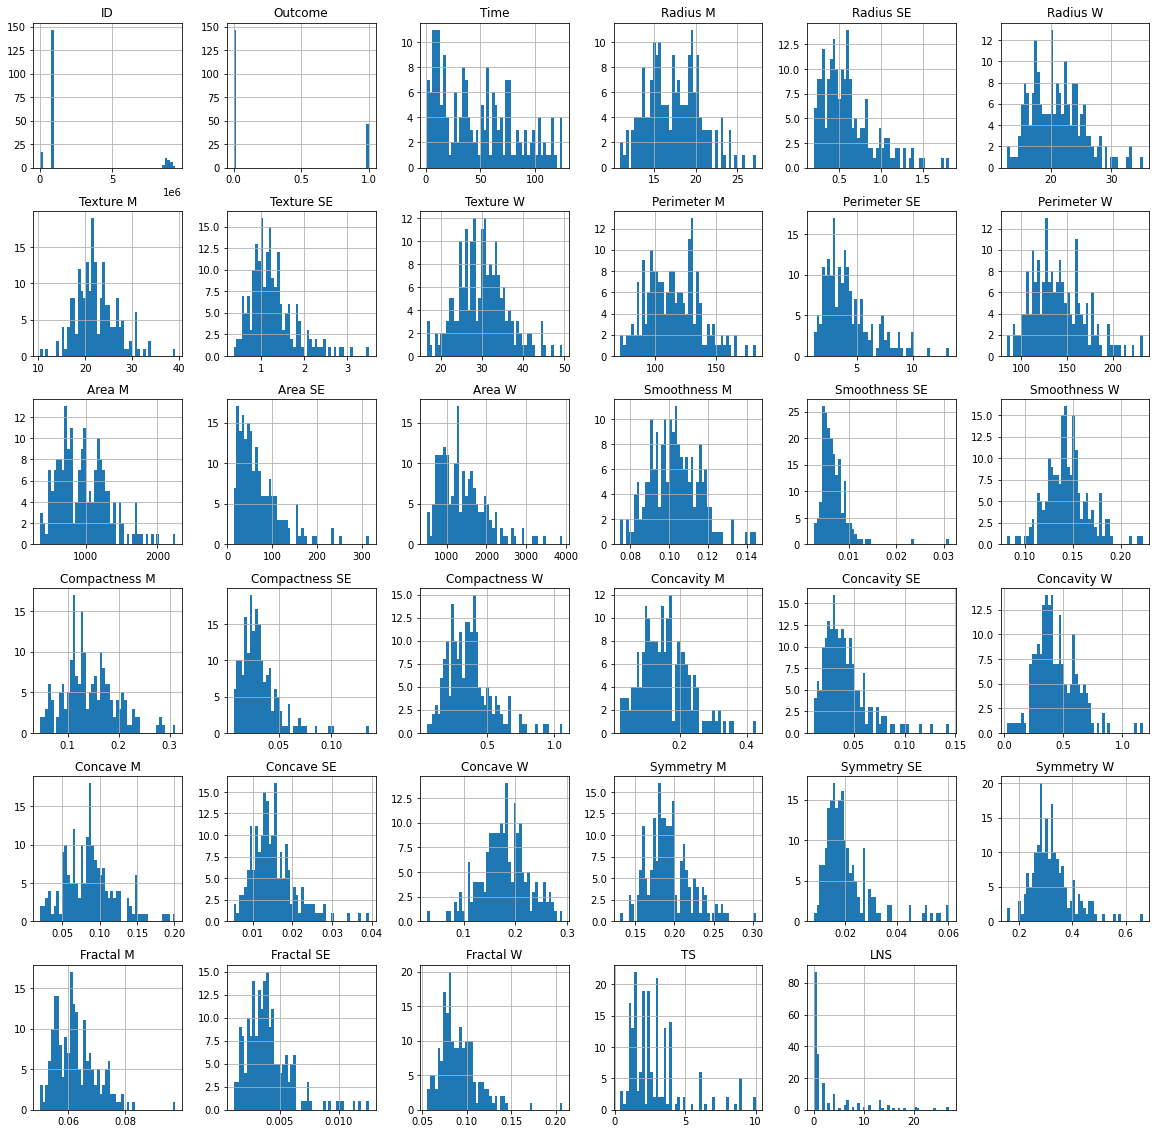

In [103]:
data.hist(bins=50, figsize=(20, 20))

In [104]:
#Dropping the ''ID' Column
data.drop(labels=['ID'], axis=1, inplace=True)

In [105]:
data.skew()

Outcome           1.237883
Time              0.510698
Radius M          0.322253
Radius SE         1.269435
Radius W          0.623350
Texture M         0.567525
Texture SE        1.310016
Texture W         0.396496
Perimeter M       0.401985
Perimeter SE      1.273058
Perimeter W       0.655481
Area M            0.729840
Area SE           1.825153
Area W            1.220224
Smoothness M      0.417974
Smoothness SE     3.900931
Smoothness W      0.467948
Compactness M     0.601872
Compactness SE    2.065587
Compactness W     1.162191
Concavity M       0.668104
Concavity SE      1.733604
Concavity W       0.807372
Concave M         0.689548
Concave SE        1.276269
Concave W        -0.139869
Symmetry M        0.753354
Symmetry SE       2.113303
Symmetry W        1.137123
Fractal M         0.988034
Fractal SE        1.659301
Fractal W         1.502136
TS                1.750947
LNS               2.257606
dtype: float64

######Radius SE, Texture SE, Perimeter SE, Area SE, Area W, Smoothness SE, Compactness SE, Compactness W,Concavity SE,Concave SE,Symmetry SE, Symmetry W,Fractal SE, Fractal W, TS, LNS - Skewed, needs to be normalise

###Checking for outliers

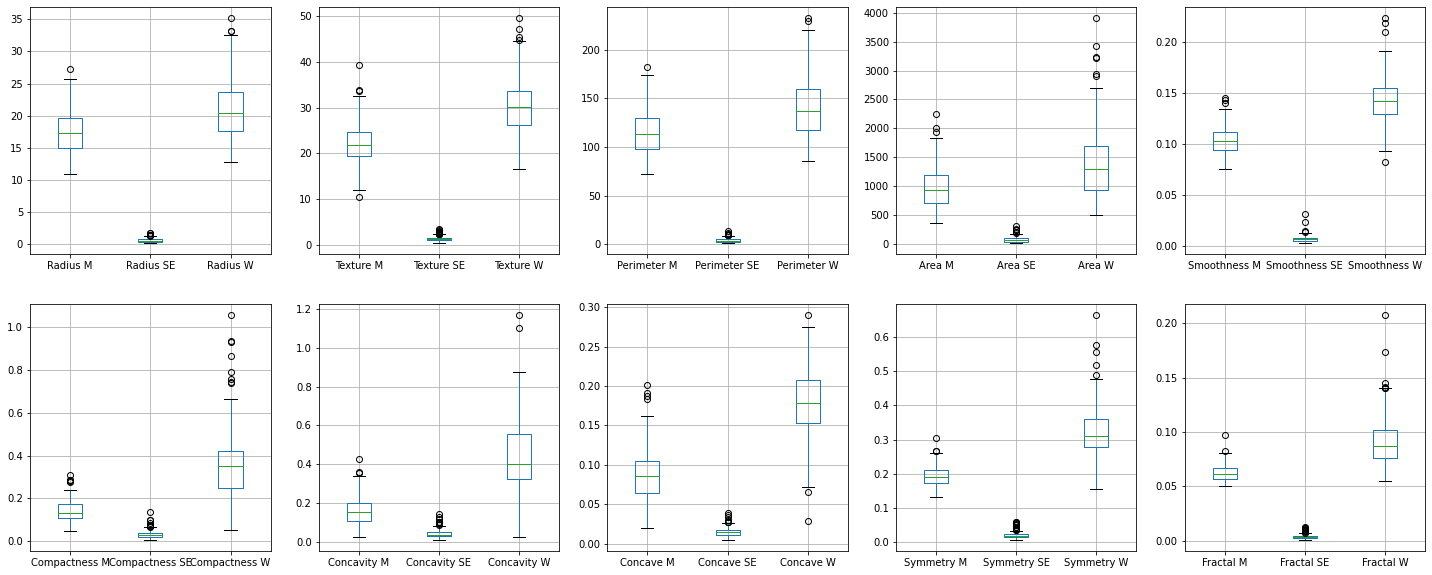

In [106]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10))
data.boxplot(column=['Radius M', 'Radius SE', 'Radius W'], ax=ax[0, 0])
data.boxplot(column=['Texture M', 'Texture SE', 'Texture W'], ax=ax[0, 1])
data.boxplot(column=['Perimeter M', 'Perimeter SE', 'Perimeter W'], ax=ax[0, 2])
data.boxplot(column=['Area M', 'Area SE', 'Area W'], ax=ax[0, 3])
data.boxplot(column=['Smoothness M', 'Smoothness SE', 'Smoothness W'], ax=ax[0, 4])
data.boxplot(column=['Compactness M', 'Compactness SE', 'Compactness W'], ax=ax[1, 0])
data.boxplot(column=['Concavity M', 'Concavity SE', 'Concavity W'], ax=ax[1, 1])
data.boxplot(column=['Concave M', 'Concave SE', 'Concave W'], ax=ax[1, 2])
data.boxplot(column=['Symmetry M', 'Symmetry SE', 'Symmetry W'], ax=ax[1, 3])
data.boxplot(column=['Fractal M', 'Fractal SE', 'Fractal W'], ax=ax[1, 4])

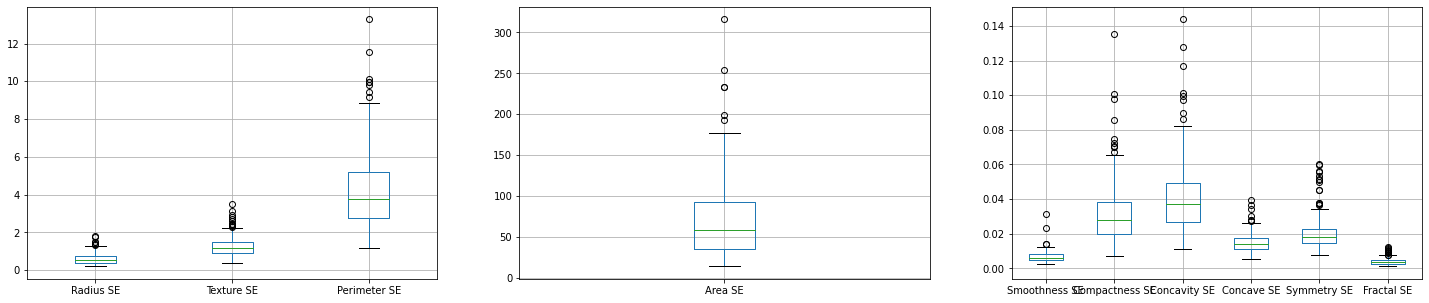

In [107]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
data.boxplot(column=['Radius SE', 'Texture SE', 'Perimeter SE'], ax=ax[0])
data.boxplot(column=['Area SE'], ax=ax[1])
data.boxplot(column=['Smoothness SE', 'Compactness SE', 'Concavity SE',  'Concave SE', 'Symmetry SE', 'Fractal SE'], ax=ax[2])

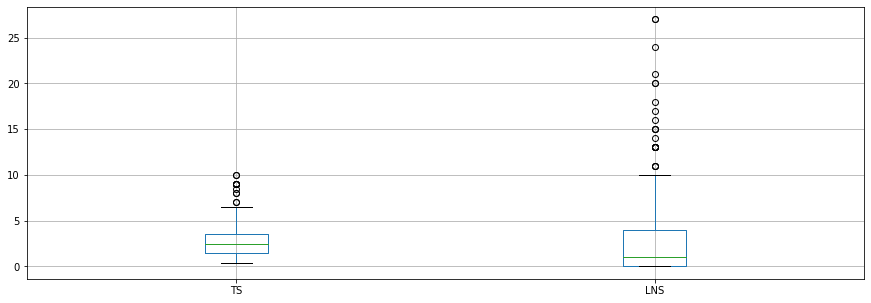

In [108]:
data.boxplot(column=['TS', 'LNS'], figsize=(15, 5))

In [109]:
#Converting data type of 'LNS' to Int (currently LNS is object type since '?' was in it)
data['Outcome'] = pd.to_numeric(data['Outcome'])
data['Outcome'].dtypes

dtype('int64')

In [110]:
# correlation_matrix = data.corr()

# sns.heatmap(correlation_matrix)
# plt.show()
# correlation_matrix

Outcome	1.000000	-0.347843	0.164352	0.115608	0.221729	-0.066662	-0.074779	-0.048157	0.165179	0.121482	0.217214	0.179180	0.136044	0.223162	0.010998	-0.062215	0.032873	-0.013804	-0.019447	-0.026941	0.039361	-0.072385	0.010775	0.102530	-0.080762	0.064407	-0.102477	-0.042051	-0.064406	-0.120016	-0.049159	-0.055269	0.176999	0.170287


##Ongoing Work

In [111]:
#data.shape

In [112]:
#data['Outcome'].value_counts()

In [113]:
#  Z_list = ['Perimeter SE', 'Area SE', 'Radius SE', 'Smoothness M', 'Smoothness W', 'LNS', 'Concave W', 'Concavity M']

#  for i in Z_list:
#    data = data[(np.abs(stats.zscore(data[i])) < 3)]

# Z_list = ['Radius M','Texture M','Perimeter M', 'Area M','Smoothness M','Compactness M'	,'Concavity M','Concave M','Symmetry M', 'Fractal M',
#                  'Radius SE','Texture SE','Perimeter SE', 'Area SE','Smoothness SE','Compactness SE'	,'Concavity SE','Concave SE','Symmetry SE', 'Fractal SE',
#                  'Radius W','Texture W','Perimeter W', 'Area W','Smoothness W','Compactness W'	,'Concavity W','Concave W','Symmetry W', 'Fractal W','TS','LNS']
# for i in Z_list:
#data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [114]:
#data.shape

In [115]:
#data['Outcome'].value_counts()

In [116]:
# correlation_matrix = data.corr()

# sns.heatmap(correlation_matrix)
# plt.show()
# correlation_matrix

In [117]:
# data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [118]:
# correlation_matrix = data.corr()

# sns.heatmap(correlation_matrix)
# plt.show()
# correlation_matrix

In [119]:
#sns.pairplot(data, hue='Outcome', markers='+')
#plt.show()

## large number of features consume a condierable amount of time to generate the plot
##observations were noted doen by one time running the above code

#Preprocessing - Data selection
##Identify X and y

In [313]:
# X_variables = ['Radius M','Texture M','Perimeter M', 'Area M','Smoothness M','Compactness M'	,'Concavity M','Concave M','Symmetry M', 'Fractal M',
#                   'Radius SE','Texture SE','Perimeter SE', 'Area SE','Smoothness SE','Compactness SE'	,'Concavity SE','Concave SE','Symmetry SE', 'Fractal SE',
#                   'Radius W','Texture W','Perimeter W', 'Area W','Smoothness W','Compactness W'	,'Concavity W','Concave W','Symmetry W', 'Fractal W','TS','LNS']

X_variables = ['Radius M','Texture M','Perimeter M', 'Area M','Smoothness M','Compactness M'	,'Concavity M','Concave M','Symmetry M', 'Fractal M',
                   'Radius SE','Texture SE','Perimeter SE', 'Area SE','Smoothness SE','Compactness SE'	,'Concavity SE','Concave SE','Symmetry SE', 'Fractal SE',
                   'Radius W','Texture W','Perimeter W', 'Area W','Smoothness W','Compactness W'	,'Concavity W','Concave W','Symmetry W', 'Fractal W','TS','LNS']
data[X_variables].head()

,Radius M,Texture M,Perimeter M,Area M,Smoothness M,Compactness M,Concavity M,Concave M,Symmetry M,Fractal M,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave SE,Symmetry SE,Fractal SE,Radius W,Texture W,Perimeter W,Area W,Smoothness W,Compactness W,Concavity W,Concave W,Symmetry W,Fractal W,TS,LNS
0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.01805,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,0.1995,0.07164,0.3877,0.7402,2.999,30.85,0.007775,0.02987,0.04561,0.01357,0.01774,0.005114,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [121]:
y_variable = 'Outcome'
data[y_variable].head()

0    0
1    0
2    0
3    1
4    1
Name: Outcome, dtype: int64

In [244]:
print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['Radius M', 'Texture M', 'Perimeter M', 'Concavity M', 'Concave M', 'Symmetry M', 'Fractal M', 'Radius SE', 'Texture SE', 'Texture W', 'Smoothness W', 'Concave W', 'TS', 'LNS']
y_variable = Outcome


In [314]:
X = data[X_variables].values

In [124]:
y = data[y_variable].values

##Train Test Split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 135
Test sample size  = 58


In [ ]:
#  from sklearn.preprocessing import StandardScaler
#  sc = StandardScaler()
#  X_train = sc.fit_transform(X_train)
#  X_test = sc.transform(X_test)

#Model building

###Model Training Function

In [129]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  'y act': y_test,
                  'y pred': y_pred
                  })

###Selecting the best model

In [323]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, random_state = 0), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), 'KNeBR', X_train, y_train, X_test, y_test))
models.append(model_train(GaussianNB(), 'Gaus', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0), 'RF', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(criterion = 'gini', random_state = 0 ), 'DeciT-G', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(criterion = 'entropy', random_state = 0 ), 'DeciT-En', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models


,model_name,model,accuracy,precision,f1_score,roc_auc,y act,y pred
0,lgr1,"LogisticRegression(n_jobs=3, random_state=0)",0.793103,0.500000,0.749655,0.621377,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, ..."
1,KNeBR,KNeighborsClassifier(),0.689655,0.200000,0.678850,0.590580,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, ..."
2,Gaus,GaussianNB(),0.655172,0.277778,0.677626,0.539855,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
3,RF,"(DecisionTreeClassifier(criterion='entropy', m...",0.775862,0.400000,0.737640,0.684783,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
4,DeciT-G,DecisionTreeClassifier(random_state=0),0.672414,0.294118,0.691241,0.577899,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, ..."
5,DeciT-En,"DecisionTreeClassifier(criterion='entropy', ra...",0.741379,0.411765,0.756243,0.682971,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, ..."


###Tuning yperparameters using grid search


In [332]:
# parameters = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': [10, 17, 50, 100], 'max_depth': [2, 7, 9, 12, 15], 'min_samples_split': [2, 3, 5, 7, 9]}
# gs_model = GridSearchCV(DecisionTreeClassifier(), parameters)
# gs_model.fit(X_train, y_train) 

In [340]:
# parameters = {'n_estimators': [100,500,800,1500,2500,5000], 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10, 15]}
# gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
# gs_model.fit(X_train, y_train) 

In [343]:
parameters = {'n_estimators': [100,500,800,1500], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, y_train) 

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 800, 1500]},
             pre_dispatch=2, verbose=3)

In [344]:
# Best Model Paramaters
print(gs_model.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [345]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred = gs_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        46
           1       0.67      0.17      0.27        12

    accuracy                           0.81        58
   macro avg       0.74      0.57      0.58        58
weighted avg       0.79      0.81      0.76        58

[[45  1]
 [10  2]]
